In [6]:
import matplotlib.pyplot as plt

import numpy as np

### Generic g-h function

In [10]:
def g_h_filter(data, x0, dx, g, h, dt):

    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """

    x_est = x0
    result = []
    for z in data:
        x_pred = x_est + (dx*dt)
        dx = dx

        residual = z - x_pred
        dx = dx + h * (residual)/dt
        x_est = x_pred + g * residual
        result.append(x_est)
    return np.array(result)

In [4]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
time_step = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)

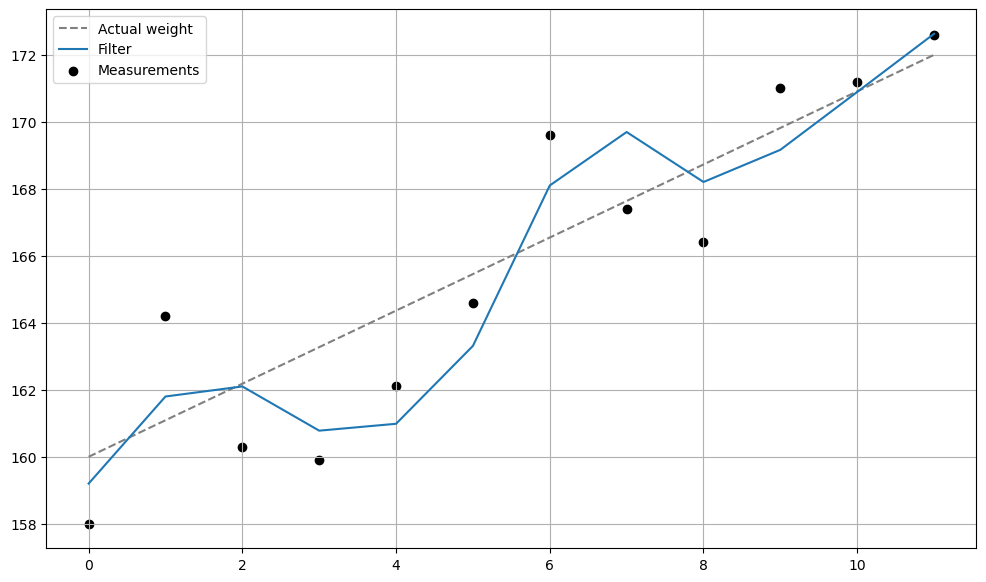

In [5]:
plt.figure(figsize=(12,7))
plt.grid()

plt.plot([0, 11], [160, 172], color='gray', linestyle='dashed', label='Actual weight')
plt.plot(time_step, data, label='Filter')
plt.scatter(time_step, weights, color='black', marker='o', label='Measurements')
plt.legend()

### Add noise in measurement model

In [10]:
def get_measurements(x0, dx, count, noise_factor, accel=0.):
    zs = []
    for i in range(count):
        zs.append(x0 + dx * i + noise_factor * np.random.randn())
        dx += accel 
    return zs

In [16]:
measurements = get_measurements(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)

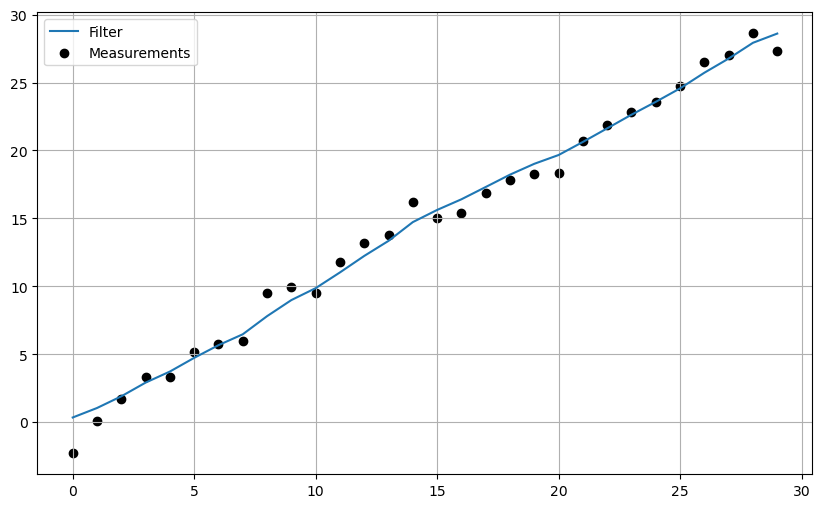

In [18]:
plt.figure(figsize=(10, 6))
plt.grid()

plt.plot([i for i in range(30)], data, label='Filter')
plt.scatter([i for i in range(30)], measurements, color='black', marker='o', label='Measurements')
plt.legend()

### Bad initial conditions

In [20]:
measurements = get_measurements(5, 2, 100, 10)
data = g_h_filter(data=measurements, x0=100., dx=2., g=0.2, h=0.02, dt=1.)

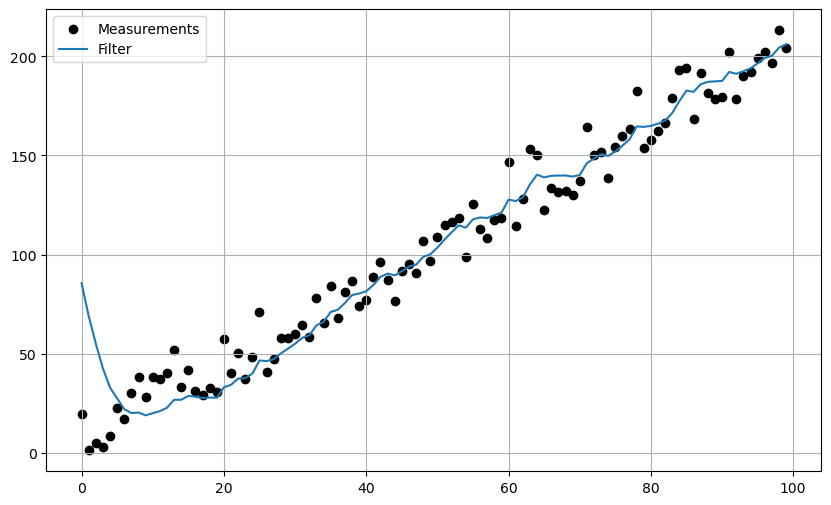

In [21]:
plt.figure(figsize=(10, 6))
plt.grid()

plt.scatter([i for i in range(100)], measurements, color='black', marker='o', label='Measurements')
plt.plot([i for i in range(100)], data, label='Filter')
plt.legend()

### Acceleration

In [22]:
measurements = get_measurements(x0=10., dx=0., count=20, noise_factor=0, accel=9.)
data = g_h_filter(data=measurements, x0=10., dx=0., g=0.2, h=0.02, dt=1)

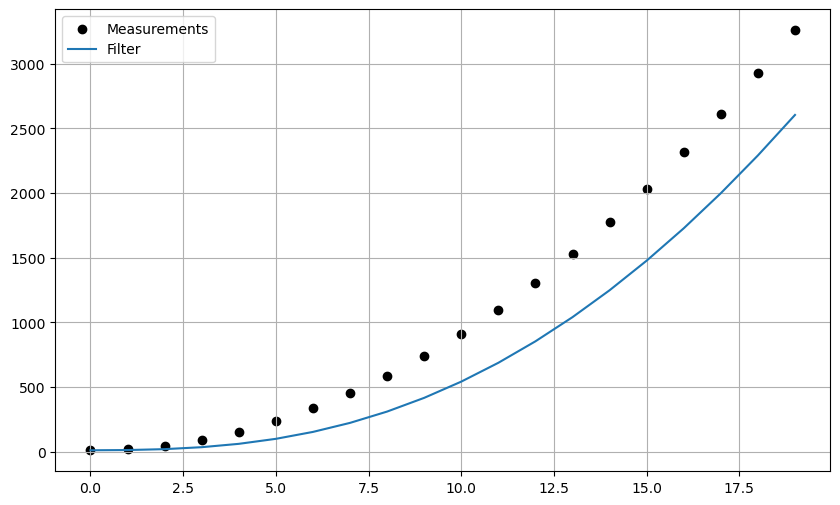

In [23]:
plt.figure(figsize=(10, 6))
plt.grid()

plt.scatter([i for i in range(20)], measurements, color='black', marker='o', label='Measurements')
plt.plot([i for i in range(20)], data, label='Filter')
plt.legend()

#### "Hence, we can conclude that if we already know the train's approximate position and velocity then we can predict its position in the near future with a great deal of accuracy."  
It is a hypothesis we can used in many cases!

### Track a train

In [2]:
from numpy.random import randn

In [4]:
def measurement_position(pos):
    return pos + randn()*500

def compute_position(pos, vel, dt=1):
    return pos + vel*dt

def get_train_data(pos, vel, count):
    zs = []
    for i in range(count):
        pos = compute_position(pos, vel)
        zs.append(measurement_position(pos))
    return np.asarray(zs)


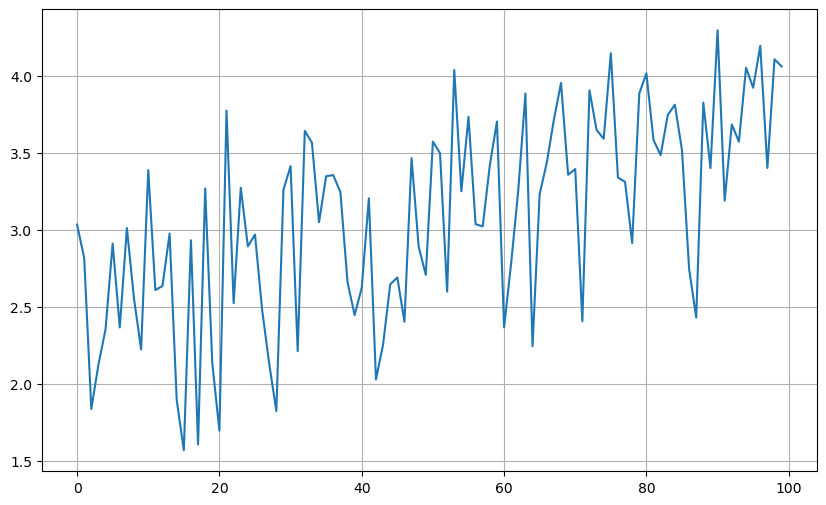

In [8]:
init_pos, init_vel = 23*100, 15.
measurements = get_train_data(init_pos, init_vel, 100)

plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(measurements/1000)

In [12]:
data = g_h_filter(data=measurements, x0=init_pos, dx=init_vel, dt=1., g=.01, h=.0001)

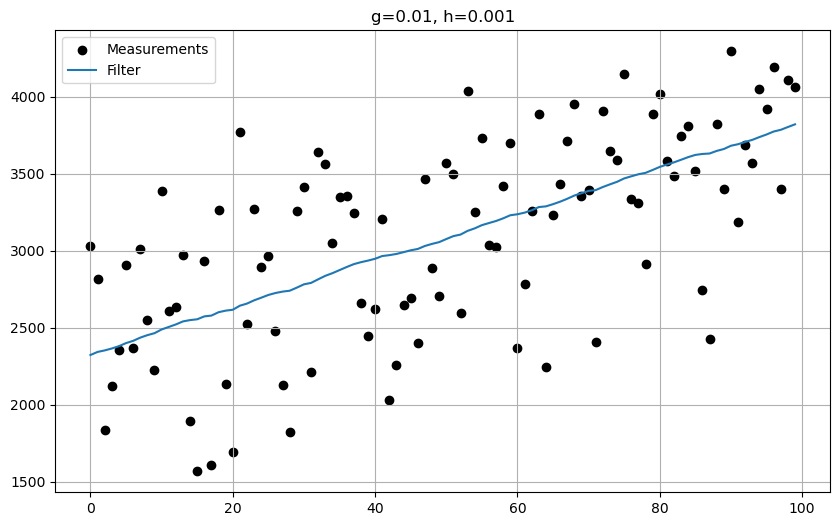

In [14]:
plt.figure(figsize=(10, 6))
plt.grid()

plt.scatter([i for i in range(100)], measurements, color='black', marker='o', label='Measurements')
plt.plot([i for i in range(100)], data, label='Filter')
plt.title('g=0.01, h=0.001')
plt.legend()

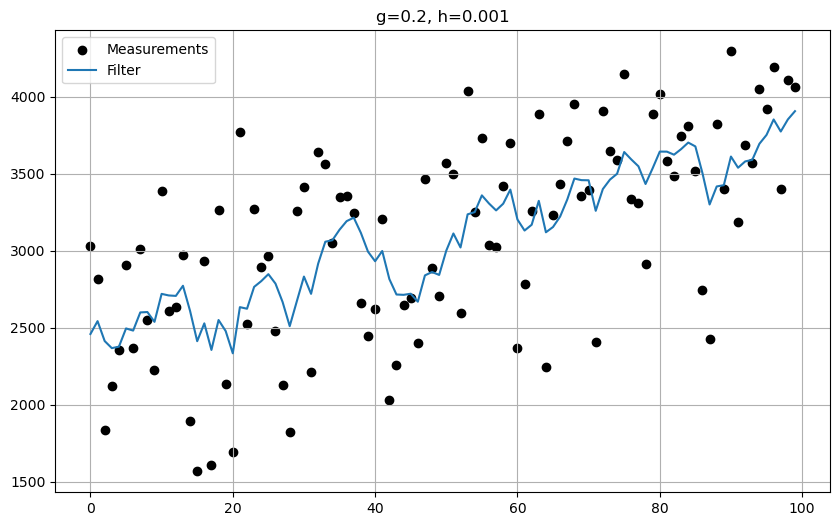

In [15]:
data = g_h_filter(data=measurements, x0=init_pos, dx=init_vel, dt=1., g=.2, h=.0001)

plt.figure(figsize=(10, 6))
plt.grid()

plt.scatter([i for i in range(100)], measurements, color='black', marker='o', label='Measurements')
plt.plot([i for i in range(100)], data, label='Filter')
plt.title('g=0.2, h=0.001')
plt.legend()

In [30]:
def plot_filter(zs, data, g=.0, h=.0, width=10, height=6):
    plt.figure(figsize=(width, height))
    plt.grid()

    plt.scatter([i for i in range(100)], zs, color='black', marker='o', label='Measurements')
    plt.plot([i for i in range(100)], data, label='Filter')
    plt.title("g= {:.2f}, h= {:.4f}".format(g, h))
    plt.legend()

### FilterPY - batch process & multiple dimensions

In [32]:
from filterpy.gh import GHFilter

In [34]:
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

print(f.batch_filter([3., 4., 5.]))

[[0.   0.  ]
 [2.4  0.6 ]
 [3.8  0.8 ]
 [4.92 0.88]]


In [35]:
x_0  = np.array([1., 10., 100.])
dx_0 = np.array([10., 12., .2])
               
f_air = GHFilter(x=x_0, dx=dx_0, dt=1., g=.8, h=.2)
f_air.update(z=np.array((2., 11., 102.)))
print(' x =', f_air.x)
print('dx =', f_air.dx)

 x = [  3.8   13.2  101.64]
dx = [8.2  9.8  0.56]
